In [2]:
import csv
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

In [3]:
dataset = pd.read_csv('production.csv')
dataset1=pd.read_csv('regressiondb.csv')
dataset2=pd.read_csv('cropph.csv')

In [4]:
dataset

,Rainfall,Temperature,Ph,Production
0,1000.49920,35.00000,5.5,0.03994
1,1001.68519,35.00000,5.5,0.13481
2,1001.95313,34.00000,5.5,0.15625
3,1002.18254,33.66667,5.5,0.17460
4,1002.37279,33.16667,5.5,0.18982
...,...,...,...,...
1518,1137.50000,39.00000,5.8,11.00000
1519,1138.75000,39.00000,5.8,11.10000
1520,1138.97059,39.00000,5.8,11.11765
1521,1144.65881,35.00000,5.8,11.12760


In [5]:
dataset1

,Rainfall,Temperature,Ph,Crop,Production,Cropconversion
0,400.15082,20.0,3.0,Bajra,0.00690,Bajra
1,400.16331,20.0,3.2,Bajra,0.00747,Bajra
2,400.16387,20.0,3.2,Bajra,0.00749,Bajra
3,400.17967,20.0,3.2,Bajra,0.00822,Bajra
4,400.19582,20.0,3.2,Bajra,0.00895,Bajra
...,...,...,...,...,...,...
189227,766.92202,23.0,6.0,Wheat,10.40000,Wheat
189228,770.28486,27.0,6.0,Wheat,10.40000,Wheat
189229,770.00000,26.0,6.1,Wheat,10.40000,Wheat
189230,633.83459,22.0,6.2,Wheat,10.40000,Wheat


In [6]:
dataset2

,Crop,Ph
0,Bajra,3.00
1,Banana,6.50
2,Barley,3.00
3,Bean,5.50
4,Black pepper,6.40
5,Blackgram,5.00
6,Bottle Gourd,6.50
7,Brinjal,5.50
8,Cabbage,5.50
9,Cardamom,4.50


In [7]:
print('Number of missing values in dataset')
print(dataset.isnull().sum().sum())

Number of missing values in dataset
0


In [8]:
print('Number of missing values in dataset')
print(dataset1.isnull().sum().sum())

Number of missing values in dataset
0


In [9]:
print('Number of missing values in dataset')
print(dataset2.isnull().sum().sum())

Number of missing values in dataset
0


In [10]:
cropdict = {'Bajra' :1 ,'Banana':2,'Barley':3,'Bean':4,'Black pepper':5,'Blackgram':6,'Bottle Gourd':7,'Brinjal':8,'Cabbage':9,'Cardamom':10,'Carrot':11,'Castor seed':12,'Cauliflower':13,'Chillies':14,'Colocosia':15,'Coriander':16,'Cotton':17,'Cowpea':18,'Drum Stick':19,'Garlic':20,'Ginger':21,'Gram':22,'Grapes':23,'Groundnut':24,'Guar seed':25,'Horse-gram':26,'Jowar':27,'Jute':27,'Khesari':28,'Lady Finger':29,'Lentil':30,'Linseed':31,'Maize':32,'Mesta':33,'Moong(Green Gram)':34,'Moth':35,'Onion':36,'Orange':37,'Papaya':38,'Peas & beans (Pulses)':39,'Pineapple':40,'Potato':41,'Raddish':42,'Ragi':43,'Rice':44,'Safflower':45,'Sannhamp':46,'Sesamum':47,'Soyabean':48,'Sugarcane':49,'Sunflower':50,'Sweet potato':51,'Tapioca':52,'Tomato':53,'Turmeric':54,'Urad':55,'Varagu':56,'Wheat':57}

In [11]:
#dataset1['Cropconversion'] = dataset1['Cropconversion'].map(cropdict)
#a=dataset1.Cropconversion

In [12]:
dataset1

,Rainfall,Temperature,Ph,Crop,Production,Cropconversion
0,400.15082,20.0,3.0,Bajra,0.00690,Bajra
1,400.16331,20.0,3.2,Bajra,0.00747,Bajra
2,400.16387,20.0,3.2,Bajra,0.00749,Bajra
3,400.17967,20.0,3.2,Bajra,0.00822,Bajra
4,400.19582,20.0,3.2,Bajra,0.00895,Bajra
...,...,...,...,...,...,...
189227,766.92202,23.0,6.0,Wheat,10.40000,Wheat
189228,770.28486,27.0,6.0,Wheat,10.40000,Wheat
189229,770.00000,26.0,6.1,Wheat,10.40000,Wheat
189230,633.83459,22.0,6.2,Wheat,10.40000,Wheat


In [13]:
#dataset1['Cropconversion'] = dataset1['Cropconversion'].map(cropdict)
#a=dataset1.Cropconversion
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
dataset1['Crop']= labelencoder_X.fit_transform(dataset1['Crop'])
print("\n",dataset1['Crop'],"\n")


 0          0
1          0
2          0
3          0
4          0
          ..
189227    57
189228    57
189229    57
189230    57
189231    57
Name: Crop, Length: 189232, dtype: int32 



In [14]:
dataset1

,Rainfall,Temperature,Ph,Crop,Production,Cropconversion
0,400.15082,20.0,3.0,0,0.00690,Bajra
1,400.16331,20.0,3.2,0,0.00747,Bajra
2,400.16387,20.0,3.2,0,0.00749,Bajra
3,400.17967,20.0,3.2,0,0.00822,Bajra
4,400.19582,20.0,3.2,0,0.00895,Bajra
...,...,...,...,...,...,...
189227,766.92202,23.0,6.0,57,10.40000,Wheat
189228,770.28486,27.0,6.0,57,10.40000,Wheat
189229,770.00000,26.0,6.1,57,10.40000,Wheat
189230,633.83459,22.0,6.2,57,10.40000,Wheat


In [15]:
X1 = dataset1[['Rainfall', 'Temperature', 'Ph']]
Y1 = dataset1.Cropconversion
# Split data
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y1,test_size = 0.2, random_state=1)

In [16]:
gnb = GaussianNB()
gnb.fit(X1_train, y1_train)
gnb_pred = gnb.predict(X1_test)
print(gnb_pred)

['Gram' 'Horse-gram' 'Sugarcane' ... 'Rice' 'Sesamum' 'Moong(Green Gram)']


In [17]:
#y_pred = gnb.predict([['748.4', '24', '5.9']])
#print(y_pred)

In [18]:
nbacc=round(accuracy_score(y1_test, gnb_pred)*100,2)
print('Accuracy score of the Naive Bayes is ')
print(nbacc)

Accuracy score of the Naive Bayes is 
65.57


In [19]:
from sklearn.ensemble import BaggingClassifier
bagg = BaggingClassifier()
bagg.fit(X1_train, y1_train)
bagg_pred=bagg.predict(X1_test)
print(bagg_pred)

['Castor seed' 'Horse-gram' 'Sugarcane' ... 'Rice' 'Sannhamp'
 'Moong(Green Gram)']


In [20]:
baggacc=round(accuracy_score(y1_test, bagg_pred)*100,2)
print('Accuracy score of the Bagged Tree is ')
print(baggacc)

Accuracy score of the Bagged Tree is 
99.76


In [21]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X1_train, y1_train)

#Predict the response for test dataset
abc_pred = model.predict(X1_test)
print(abc_pred)

['Maize' 'Maize' 'Sugarcane' ... 'Sugarcane' 'Maize' 'Maize']


In [22]:
abcacc=round(accuracy_score(y1_test, abc_pred)*100,2)
print('Accuracy score of the AdaBoostClassifier is ')
print(abcacc)

Accuracy score of the AdaBoostClassifier is 
11.23


In [23]:
from xgboost import XGBClassifier

C:\Users\shara\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [24]:
model_bow = XGBClassifier(random_state=22,learning_rate=0.9)

In [25]:
model_bow.fit(X1_train, y1_train)
y_predbow = model_bow.predict(X1_test)
print(y_predbow)

C:\Users\shara\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\shara\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11:19:37] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
['Wheat' 'Cotton' 'Rice' ... 'Chillies' 'Cotton' 'Cotton']


In [26]:
bowacc=round(accuracy_score(y1_test, y_predbow)*100,2)
print('Accuracy score of the XGBClassifier is ')
print(bowacc)

Accuracy score of the XGBClassifier is 
7.09


In [27]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
tree_model.fit(X1_train, y1_train)
tree_yhat = tree_model.predict(X1_test)
print(tree_yhat)

['Urad' 'Maize' 'Rice' ... 'Rice' 'Sesamum' 'Urad']


In [28]:
dtacc=round(accuracy_score(y1_test, tree_yhat)*100,2)
print('Accuracy score of the Decision Tree is ')
print(dtacc)

Accuracy score of the Decision Tree is 
44.89


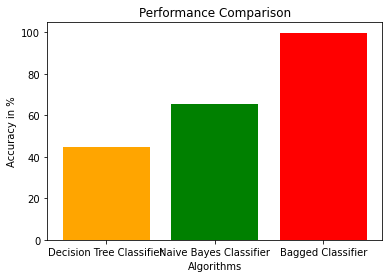

In [29]:
import matplotlib.pyplot as plt 
  
# x-coordinates of left sides of bars  
left = [1,2,3] 
  
# heights of bars 
height = [44.89, 65.57, 99.74] 
  
# labels for bars 
tick_label = ['Decision Tree Classifier', 'Naive Bayes Classifier', 'Bagged Classifier'] 
  
# plotting a bar chart 
plt.bar(left, height, tick_label = tick_label, 
        width = 0.8, color = ['orange', 'green', 'red']) 
  
# naming the x-axis 
plt.xlabel('Algorithms') 
# naming the y-axis 
plt.ylabel('Accuracy in %') 
# plot title 
plt.title('Performance Comparison') 
  
# function to show the plot 
plt.show() 

In [ ]:
from sklearn.svm import SVC  
svc = SVC(kernel='linear') 
svc.fit(X1_train, y1_train)
svc_pred=svc.predict(X1_test)
print(svc_pred)

In [ ]:
svcacc=round(accuracy_score(y1_test, svc_pred)*100,2)
print('Accuracy score of the SVM is ')
print(svcacc)